In [23]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [24]:
data=pd.read_csv("train.csv")   
titanic_data = pd.read_csv('test.csv')

In [25]:
#删除无关信息,补充缺失信息
data.drop(['Name','PassengerId','Ticket','Cabin'],axis=1,inplace=True)
data['Age']=data['Age'].fillna(data['Age'].mean())
data['Fare']=data['Fare'].fillna(data['Fare'].mean())
data['Embarked']=data['Embarked'].fillna(data['Embarked'].value_counts().index[0])

titanic_data.drop(['Name','PassengerId','Ticket','Cabin'],axis=1,inplace=True)
titanic_data['Age']=titanic_data['Age'].fillna(titanic_data['Age'].mean())
titanic_data['Fare']=titanic_data['Fare'].fillna(titanic_data['Fare'].mean())
titanic_data['Embarked']=titanic_data['Embarked'].fillna(titanic_data['Embarked'].value_counts().index[0])
 
#将性别与登船港口进行数据转换
data.loc[data["Sex"] == "male", "Sex"] = 0
data.loc[data["Sex"] == "female", "Sex"] = 1

titanic_data.loc[titanic_data["Sex"] == "male", "Sex"] = 0
titanic_data.loc[titanic_data["Sex"] == "female", "Sex"] = 1

data["Embarked"] = data["Embarked"].fillna('S')
data.loc[data["Embarked"] == "S", "Embarked"] = 0
data.loc[data["Embarked"] == "C", "Embarked"] = 1
data.loc[data["Embarked"] == "Q", "Embarked"] = 2

titanic_data["Embarked"] = titanic_data["Embarked"].fillna('S')
titanic_data.loc[titanic_data["Embarked"] == "S", "Embarked"] = 0
titanic_data.loc[titanic_data["Embarked"] == "C", "Embarked"] = 1
titanic_data.loc[titanic_data["Embarked"] == "Q", "Embarked"] = 2

#数据缩放
data['Age']=(data['Age']-data['Age'].min()) / (data['Age'].max()-data['Age'].min())
data['Fare']=(data['Fare']-data['Fare'].min()) / (data['Fare'].max()-data['Fare'].min())

titanic_data['Age']=(titanic_data['Age']-titanic_data['Age'].min()) / (titanic_data['Age'].max()-titanic_data['Age'].min())
titanic_data['Fare']=(titanic_data['Fare']-titanic_data['Fare'].min()) / (titanic_data['Fare'].max()-titanic_data['Fare'].min())

print(data.describe())
print(titanic_data.describe())

         Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642    0.367921    0.523008    0.381594    0.062858
std      0.486592    0.836071    0.163383    1.102743    0.806057    0.096995
min      0.000000    1.000000    0.000000    0.000000    0.000000    0.000000
25%      0.000000    2.000000    0.271174    0.000000    0.000000    0.015440
50%      0.000000    3.000000    0.367921    0.000000    0.000000    0.028213
75%      1.000000    3.000000    0.434531    1.000000    0.000000    0.060508
max      1.000000    3.000000    1.000000    8.000000    6.000000    1.000000
           Pclass         Age       SibSp       Parch        Fare
count  418.000000  418.000000  418.000000  418.000000  418.000000
mean     2.265550    0.396975    0.447368    0.392344    0.069540
std      0.841838    0.166617    0.896760    0.981429    0.108993
min      1.000000    0.000000    0

In [26]:
#划分训练集和测试集，既预留一部分数据(30%),用于评估模型。
from sklearn.model_selection import train_test_split
X=data.drop('Survived',axis=1)
y=data.Survived
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [27]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [28]:
model.fit(X_train,y_train)
print('训练集准确率：\n',model.score(X_train,y_train))
print('验证集准确率：\n',model.score(X_test,y_test))

训练集准确率：
 0.8105939004815409
验证集准确率：
 0.8022388059701493


In [33]:
y_pred=model.predict(X_test)

features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = titanic_data[features]
pred=model.predict(X)
print(pred)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [34]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test,y_pred),)

[[143  18]
 [ 35  72]]


In [35]:
#每个样例属于正类的概率值
y_pred_prob =model.predict_proba(X_test)
 
#计算ROC曲线
fpr,tpr,thresholds = metrics.roc_curve(y_test,y_pred_prob[:,1])
 
#计算AUC值
auc1=metrics.auc(fpr,tpr)
print(auc1)
 
 

0.8631508678237649


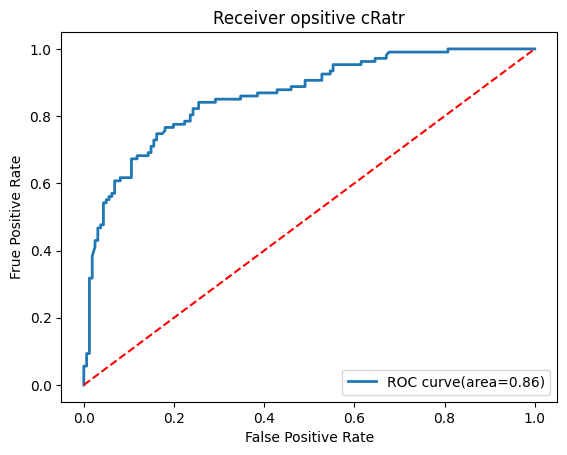

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
 
plt.plot(fpr,tpr,lw=2,label='ROC curve(area={:.2f})'.format(auc1))
plt.plot([0,1],[0,1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('Frue Positive Rate')
plt.title('Receiver opsitive cRatr')
plt.legend(loc='lower right')